In [1]:
from mwrogue.esports_client import EsportsClient
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_scoreboard_players_in_tournament(tournament):
    site = EsportsClient("lol")
    response = site.cargo_client.query(
        tables="ScoreboardGames=SG, ScoreboardPlayers=SP, Tournaments=T",
        join_on="SG.GameId=SP.GameId, SG.OverviewPage=T.OverviewPage",
        fields="SP.Name, SP.Champion, SP.Kills, SP.Deaths, SP.Assists, SP.Gold, SP.CS, SP.DamageToChampions, SP.VisionScore, SP.PlayerWin, SP.Role",
        where=f"T.Name = '{tournament}'"
    )
    return pd.DataFrame(response)

In [3]:
def get_players_images():
    site = EsportsClient("lol")
    response = site.cargo_client.query(
        tables="PlayerImages=PI",
        fields="PI.FileName, PI.Link, PI.Team, PI.Tournament, ImageType, PI.Caption, PI.IsProfileImage, PI.SortDate"
    )
    return pd.DataFrame(response)

In [4]:
players_images = get_players_images()

In [5]:
players_images["FileName"] = players_images["FileName"].str.replace(" ", "_")

In [6]:
players_images["image_url"] = players_images.apply(
    lambda row: f"https://lol.fandom.com/wiki/{row['Link']}?file={row['FileName']}",
    axis=1
)

In [7]:
df_sbp_LEC_2025_spring = get_scoreboard_players_in_tournament("LEC 2025 Spring")

In [8]:
df_sbp_LEC_2025_spring

,Name,Champion,Kills,Deaths,Assists,Gold,CS,DamageToChampions,VisionScore,PlayerWin,Role
0,113,Lillia,0,5,5,10173,218,14530,36,No,Jungle
1,113,Maokai,1,1,4,11580,221,18763,50,No,Jungle
2,113,Maokai,1,3,16,9311,138,10323,35,Yes,Jungle
3,113,Maokai,2,2,9,12829,234,25040,57,Yes,Jungle
4,113,Nidalee,4,3,6,13589,231,15628,56,No,Jungle
...,...,...,...,...,...,...,...,...,...,...,...
1055,Yike,Vi,3,5,3,11049,195,11171,47,No,Jungle
1056,Yike,Vi,4,0,11,11648,180,11249,47,Yes,Jungle
1057,Yike,Vi,6,3,10,12542,214,12625,57,Yes,Jungle
1058,Yike,Xin Zhao,3,1,4,11660,218,9939,46,Yes,Jungle


In [9]:
df_sbp_LEC_2025_spring["Kills"] = pd.to_numeric(df_sbp_LEC_2025_spring["Kills"], errors="coerce")

In [10]:
df_sbp_LEC_2025_spring["Deaths"] = pd.to_numeric(df_sbp_LEC_2025_spring["Deaths"], errors="coerce")

In [11]:
df_sbp_LEC_2025_spring["Assists"] = pd.to_numeric(df_sbp_LEC_2025_spring["Assists"], errors="coerce")

In [12]:
df_sbp_LEC_2025_spring["Gold"] = pd.to_numeric(df_sbp_LEC_2025_spring["Gold"], errors="coerce")

In [13]:
df_sbp_LEC_2025_spring["CS"] = pd.to_numeric(df_sbp_LEC_2025_spring["CS"], errors="coerce")

In [14]:
df_sbp_LEC_2025_spring["DamageToChampions"] = pd.to_numeric(df_sbp_LEC_2025_spring["DamageToChampions"], errors="coerce")

In [15]:
df_sbp_LEC_2025_spring["VisionScore"] = pd.to_numeric(df_sbp_LEC_2025_spring["VisionScore"], errors="coerce")

In [16]:
df_sbp_LEC_2025_spring['PlayerWin'] = df_sbp_LEC_2025_spring['PlayerWin'].map({'Yes': True, 'No': False})

In [17]:
df_sbp_LEC_2025_spring["Role"].value_counts()

Role
Jungle     212
Top        212
Support    212
Bot        212
Mid        212
Name: count, dtype: int64

In [18]:
df_support_LEC = df_sbp_LEC_2025_spring[df_sbp_LEC_2025_spring['Role'] == 'Support']
df_adc_LEC = df_sbp_LEC_2025_spring[df_sbp_LEC_2025_spring['Role'] == 'Bot']
df_mid_LEC = df_sbp_LEC_2025_spring[df_sbp_LEC_2025_spring['Role'] == 'Mid']
df_top_LEC = df_sbp_LEC_2025_spring[df_sbp_LEC_2025_spring['Role'] == 'Top']
df_jungle_LEC = df_sbp_LEC_2025_spring[df_sbp_LEC_2025_spring['Role'] == 'Jungle']

In [19]:
df_support_LEC

,Name,Champion,Kills,Deaths,Assists,Gold,CS,DamageToChampions,VisionScore,PlayerWin,Role
41,Alvaro,Alistar,0,5,2,6077,33,3447,113,False,Support
42,Alvaro,Alistar,1,1,13,9012,47,3543,138,True,Support
43,Alvaro,Alistar,1,2,15,7779,30,5051,100,True,Support
44,Alvaro,Alistar,1,5,7,7028,25,3458,112,False,Support
45,Alvaro,Braum,0,2,1,6027,25,3902,98,False,Support
...,...,...,...,...,...,...,...,...,...,...,...
984,Targamas,Rakan,0,1,15,7633,30,5452,100,True,Support
985,Targamas,Rakan,0,3,9,8146,42,3322,117,True,Support
986,Targamas,Rell,0,8,1,8718,49,4096,169,False,Support
987,Targamas,Rell,1,7,11,9594,40,7733,166,False,Support


In [20]:
vision_score_support = df_support_LEC.groupby("Name")["VisionScore"].mean().reset_index()

In [21]:
vision_score_support

,Name,VisionScore
0,Alvaro,128.863636
1,Execute,127.888889
2,Jun,127.619048
3,Labrov,117.590909
4,Loopy,110.263158
5,Malrang,124.000000
6,Mikyx,129.809524
7,Nisqy,120.047619
8,Parus,138.142857
9,Stend,129.238095


In [22]:
# create a df with the win % for each player in df_support_LEC
win_rate_support = df_support_LEC.groupby("Name")["PlayerWin"].mean().reset_index()
win_rate_adc = df_adc_LEC.groupby("Name")["PlayerWin"].mean().reset_index()
win_rate_mid = df_mid_LEC.groupby("Name")["PlayerWin"].mean().reset_index()
win_rate_jungle = df_jungle_LEC.groupby("Name")["PlayerWin"].mean().reset_index()
win_rate_top = df_top_LEC.groupby("Name")["PlayerWin"].mean().reset_index()

In [23]:
win_rate_support

,Name,PlayerWin
0,Alvaro,0.636364
1,Execute,0.277778
2,Jun,0.476190
3,Labrov,0.590909
4,Loopy,0.263158
5,Malrang,0.000000
6,Mikyx,0.714286
7,Nisqy,0.428571
8,Parus,0.380952
9,Stend,0.476190


In [24]:
# concatenate the two dataframes on the Name column
vision_score_support = vision_score_support.rename(columns={"VisionScore": "AvgVisionScore"})
win_rate_support = win_rate_support.rename(columns={"PlayerWin": "WinRate"})

In [25]:
vs_score_winrate_support = pd.merge(vision_score_support, win_rate_support, on="Name")

In [26]:
vs_score_winrate_support

,Name,AvgVisionScore,WinRate
0,Alvaro,128.863636,0.636364
1,Execute,127.888889,0.277778
2,Jun,127.619048,0.476190
3,Labrov,117.590909,0.590909
4,Loopy,110.263158,0.263158
5,Malrang,124.000000,0.000000
6,Mikyx,129.809524,0.714286
7,Nisqy,120.047619,0.428571
8,Parus,138.142857,0.380952
9,Stend,129.238095,0.476190


In [27]:
vs_score_winrate_support = vs_score_winrate_support[vs_score_winrate_support["Name"] != "Malrang"]

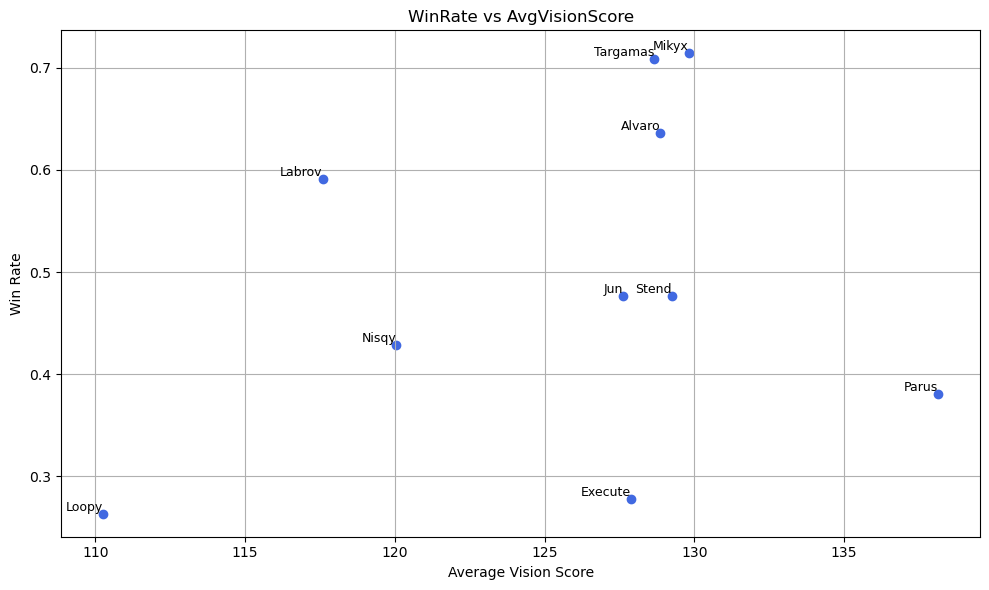

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(vs_score_winrate_support['AvgVisionScore'], vs_score_winrate_support['WinRate'], color='royalblue')

# Ajouter les noms
for i, row in vs_score_winrate_support.iterrows():
    plt.text(row['AvgVisionScore'], row['WinRate'], row['Name'],
             fontsize=9, ha='right', va='bottom')

# Titres et labels
plt.title("WinRate vs AvgVisionScore")
plt.xlabel("Average Vision Score")
plt.ylabel("Win Rate")
plt.grid(True)
plt.tight_layout()

plt.show()

In [29]:
mean_kills_adc = df_adc_LEC.groupby("Name")["Kills"].mean().reset_index()
mean_kills_mid = df_mid_LEC.groupby("Name")["Kills"].mean().reset_index()
mean_kills_jungle = df_jungle_LEC.groupby("Name")["Kills"].mean().reset_index()
mean_kills_top = df_top_LEC.groupby("Name")["Kills"].mean().reset_index()

In [30]:
mean_dmg_adc = df_adc_LEC.groupby("Name")["DamageToChampions"].mean().reset_index()
mean_dmg_mid = df_mid_LEC.groupby("Name")["DamageToChampions"].mean().reset_index()
mean_dmg_jungle = df_jungle_LEC.groupby("Name")["DamageToChampions"].mean().reset_index()
mean_dmg_top = df_top_LEC.groupby("Name")["DamageToChampions"].mean().reset_index()

In [31]:
mean_gold_adc = df_adc_LEC.groupby("Name")["Gold"].mean().reset_index()
mean_gold_mid = df_mid_LEC.groupby("Name")["Gold"].mean().reset_index()
mean_gold_jungle = df_jungle_LEC.groupby("Name")["Gold"].mean().reset_index()
mean_gold_top = df_top_LEC.groupby("Name")["Gold"].mean().reset_index()

In [32]:
kills_winrate_adc = pd.merge(mean_kills_adc, win_rate_adc, on="Name")
kills_winrate_mid = pd.merge(mean_kills_mid, win_rate_mid, on="Name")
kills_winrate_jungle = pd.merge(mean_kills_jungle, win_rate_jungle, on="Name")
kills_winrate_top = pd.merge(mean_kills_top, win_rate_top, on="Name")

In [33]:
dmg_kills_adc = pd.merge(mean_dmg_adc, mean_kills_adc, on="Name")
dmg_kills_mid = pd.merge(mean_dmg_mid, mean_kills_mid, on="Name")
dmg_kills_jungle = pd.merge(mean_dmg_jungle, mean_kills_jungle, on="Name")
dmg_kills_top = pd.merge(mean_dmg_top, mean_kills_top, on="Name")

In [34]:
dmg_gold_adc = pd.merge(mean_dmg_adc, mean_gold_adc, on="Name")
dmg_gold_mid = pd.merge(mean_dmg_mid, mean_gold_mid, on="Name")
dmg_gold_jungle = pd.merge(mean_dmg_jungle, mean_gold_jungle, on="Name")
dmg_gold_top = pd.merge(mean_dmg_top, mean_gold_top, on="Name")

In [35]:
#retire 'Trick' from the jungle dataframes
kills_winrate_jungle = kills_winrate_jungle[kills_winrate_jungle["Name"] != "Trick"]
dmg_kills_jungle = dmg_kills_jungle[dmg_kills_jungle["Name"] != "Trick"]
dmg_gold_jungle = dmg_gold_jungle[dmg_gold_jungle["Name"] != "Trick"]

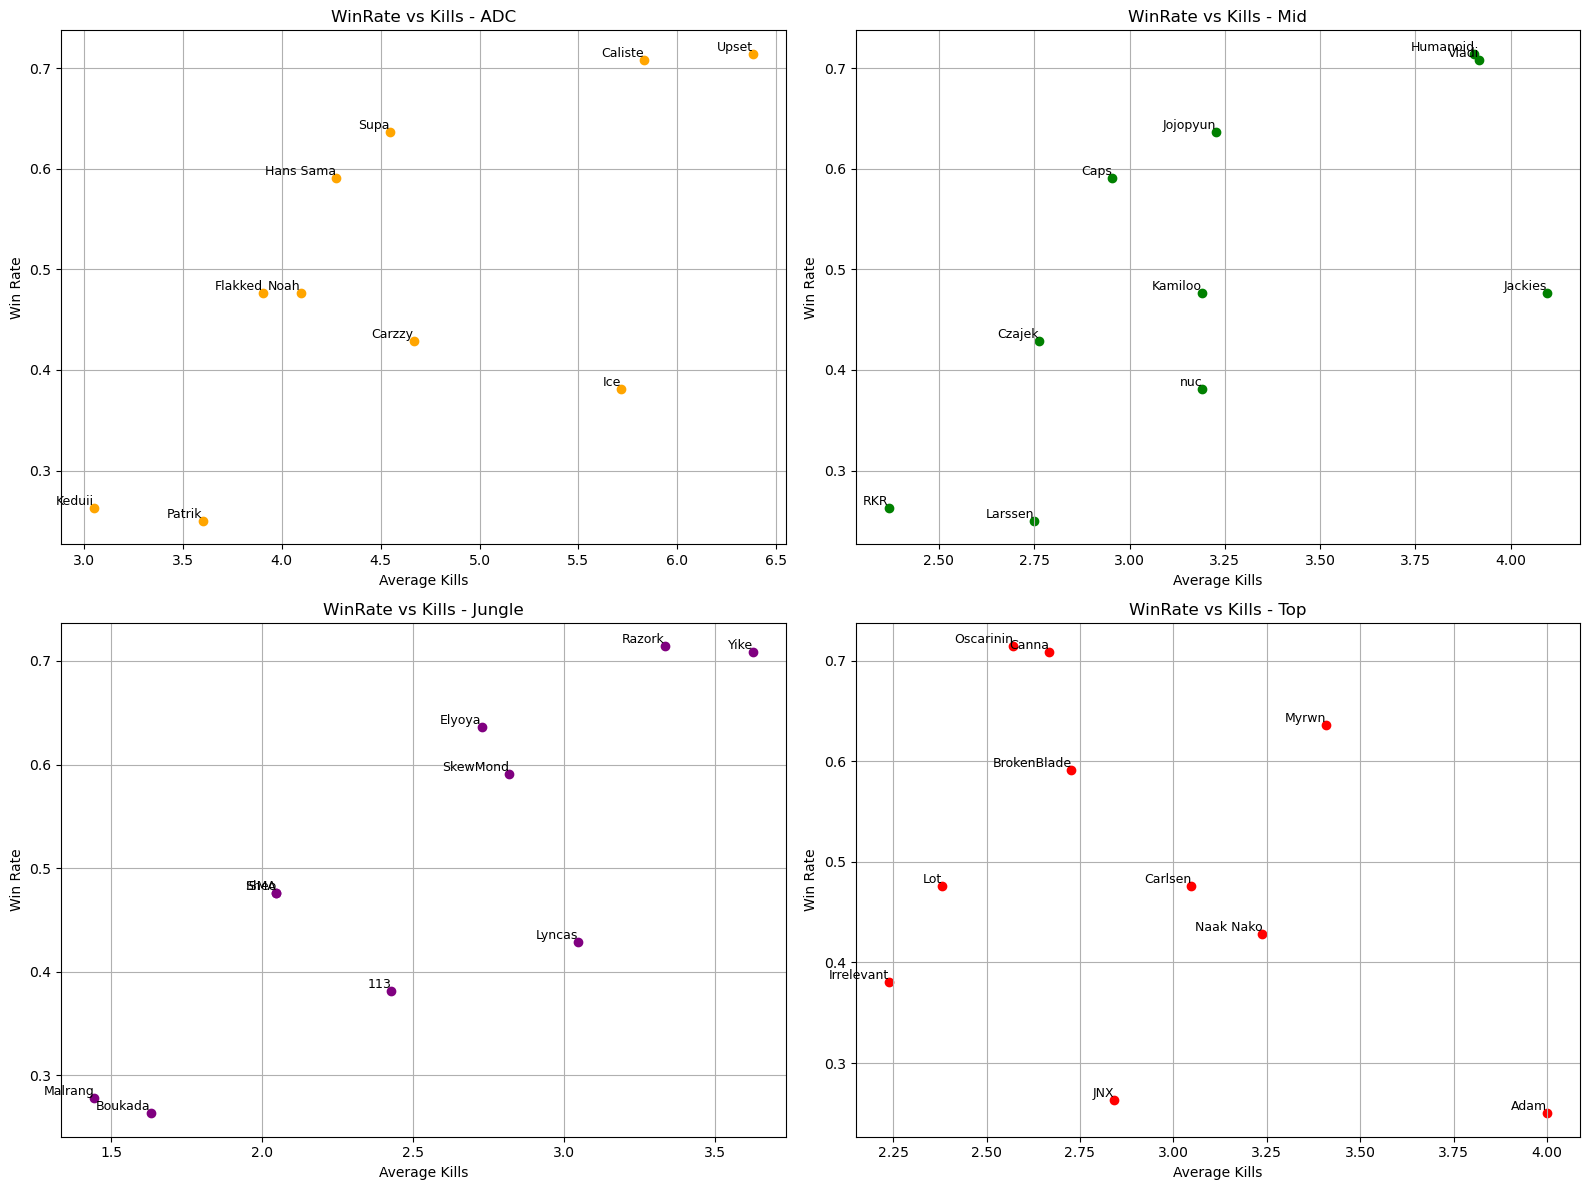

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# ADC
axs[0, 0].scatter(kills_winrate_adc['Kills'], kills_winrate_adc['PlayerWin'], color='orange')
for i, row in kills_winrate_adc.iterrows():
    axs[0, 0].text(row['Kills'], row['PlayerWin'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[0, 0].set_title("WinRate vs Kills - ADC")
axs[0, 0].set_xlabel("Average Kills")
axs[0, 0].set_ylabel("Win Rate")
axs[0, 0].grid(True)

# Mid
axs[0, 1].scatter(kills_winrate_mid['Kills'], kills_winrate_mid['PlayerWin'], color='green')
for i, row in kills_winrate_mid.iterrows():
    axs[0, 1].text(row['Kills'], row['PlayerWin'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[0, 1].set_title("WinRate vs Kills - Mid")
axs[0, 1].set_xlabel("Average Kills")
axs[0, 1].set_ylabel("Win Rate")
axs[0, 1].grid(True)

# Jungle
axs[1, 0].scatter(kills_winrate_jungle['Kills'], kills_winrate_jungle['PlayerWin'], color='purple')
for i, row in kills_winrate_jungle.iterrows():
    axs[1, 0].text(row['Kills'], row['PlayerWin'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[1, 0].set_title("WinRate vs Kills - Jungle")
axs[1, 0].set_xlabel("Average Kills")
axs[1, 0].set_ylabel("Win Rate")
axs[1, 0].grid(True)

# Top
axs[1, 1].scatter(kills_winrate_top['Kills'], kills_winrate_top['PlayerWin'], color='red')
for i, row in kills_winrate_top.iterrows():
    axs[1, 1].text(row['Kills'], row['PlayerWin'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[1, 1].set_title("WinRate vs Kills - Top")
axs[1, 1].set_xlabel("Average Kills")
axs[1, 1].set_ylabel("Win Rate")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

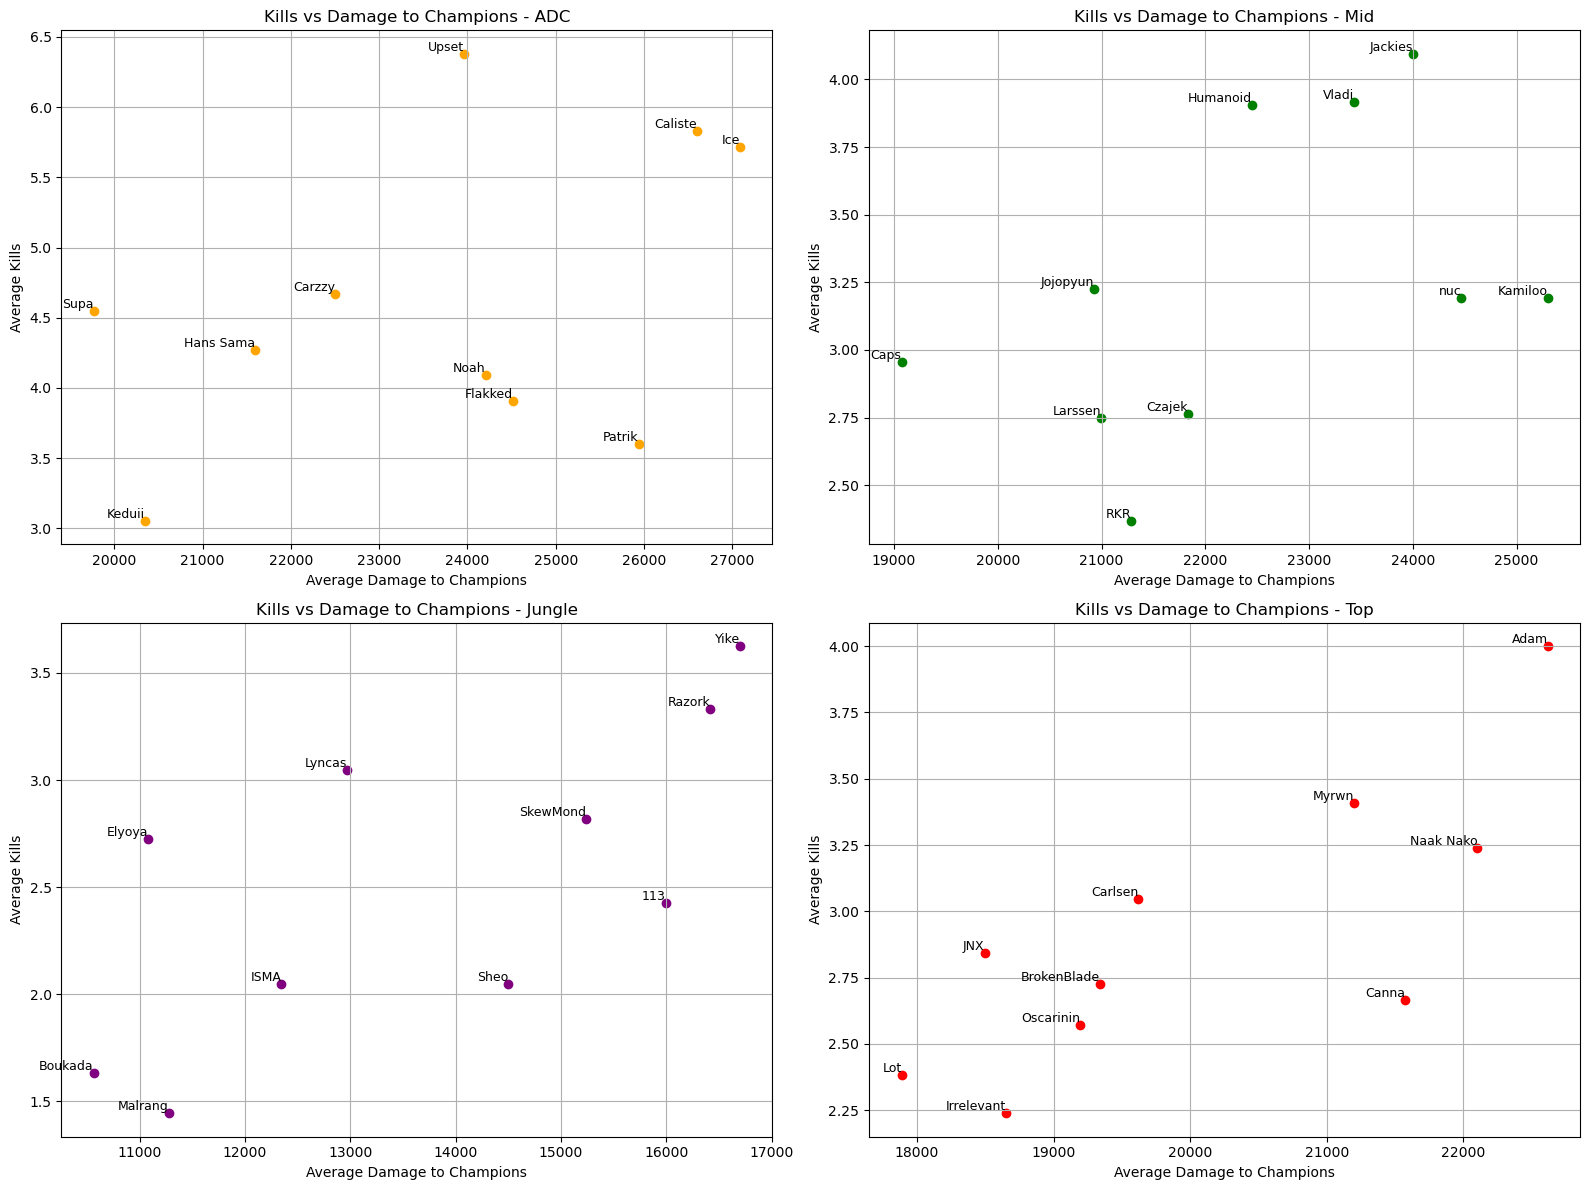

In [37]:
#plot the DMG vs Kills for each role
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
# ADC
axs[0, 0].scatter(dmg_kills_adc['DamageToChampions'], dmg_kills_adc['Kills'], color='orange')
for i, row in dmg_kills_adc.iterrows():
    axs[0, 0].text(row['DamageToChampions'], row['Kills'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[0, 0].set_title("Kills vs Damage to Champions - ADC")
axs[0, 0].set_xlabel("Average Damage to Champions")
axs[0, 0].set_ylabel("Average Kills")
axs[0, 0].grid(True)

# Mid
axs[0, 1].scatter(dmg_kills_mid['DamageToChampions'], dmg_kills_mid['Kills'], color='green')
for i, row in dmg_kills_mid.iterrows():
    axs[0, 1].text(row['DamageToChampions'], row['Kills'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[0, 1].set_title("Kills vs Damage to Champions - Mid")
axs[0, 1].set_xlabel("Average Damage to Champions")
axs[0, 1].set_ylabel("Average Kills")
axs[0, 1].grid(True)

# Jungle
axs[1, 0].scatter(dmg_kills_jungle['DamageToChampions'], dmg_kills_jungle['Kills'], color='purple')
for i, row in dmg_kills_jungle.iterrows():
    axs[1, 0].text(row['DamageToChampions'], row['Kills'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[1, 0].set_title("Kills vs Damage to Champions - Jungle")
axs[1, 0].set_xlabel("Average Damage to Champions")
axs[1, 0].set_ylabel("Average Kills")
axs[1, 0].grid(True)

# Top
axs[1, 1].scatter(dmg_kills_top['DamageToChampions'], dmg_kills_top['Kills'], color='red')
for i, row in dmg_kills_top.iterrows():
    axs[1, 1].text(row['DamageToChampions'], row['Kills'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[1, 1].set_title("Kills vs Damage to Champions - Top")
axs[1, 1].set_xlabel("Average Damage to Champions")
axs[1, 1].set_ylabel("Average Kills")
axs[1, 1].grid(True)
plt.tight_layout()
plt.show()

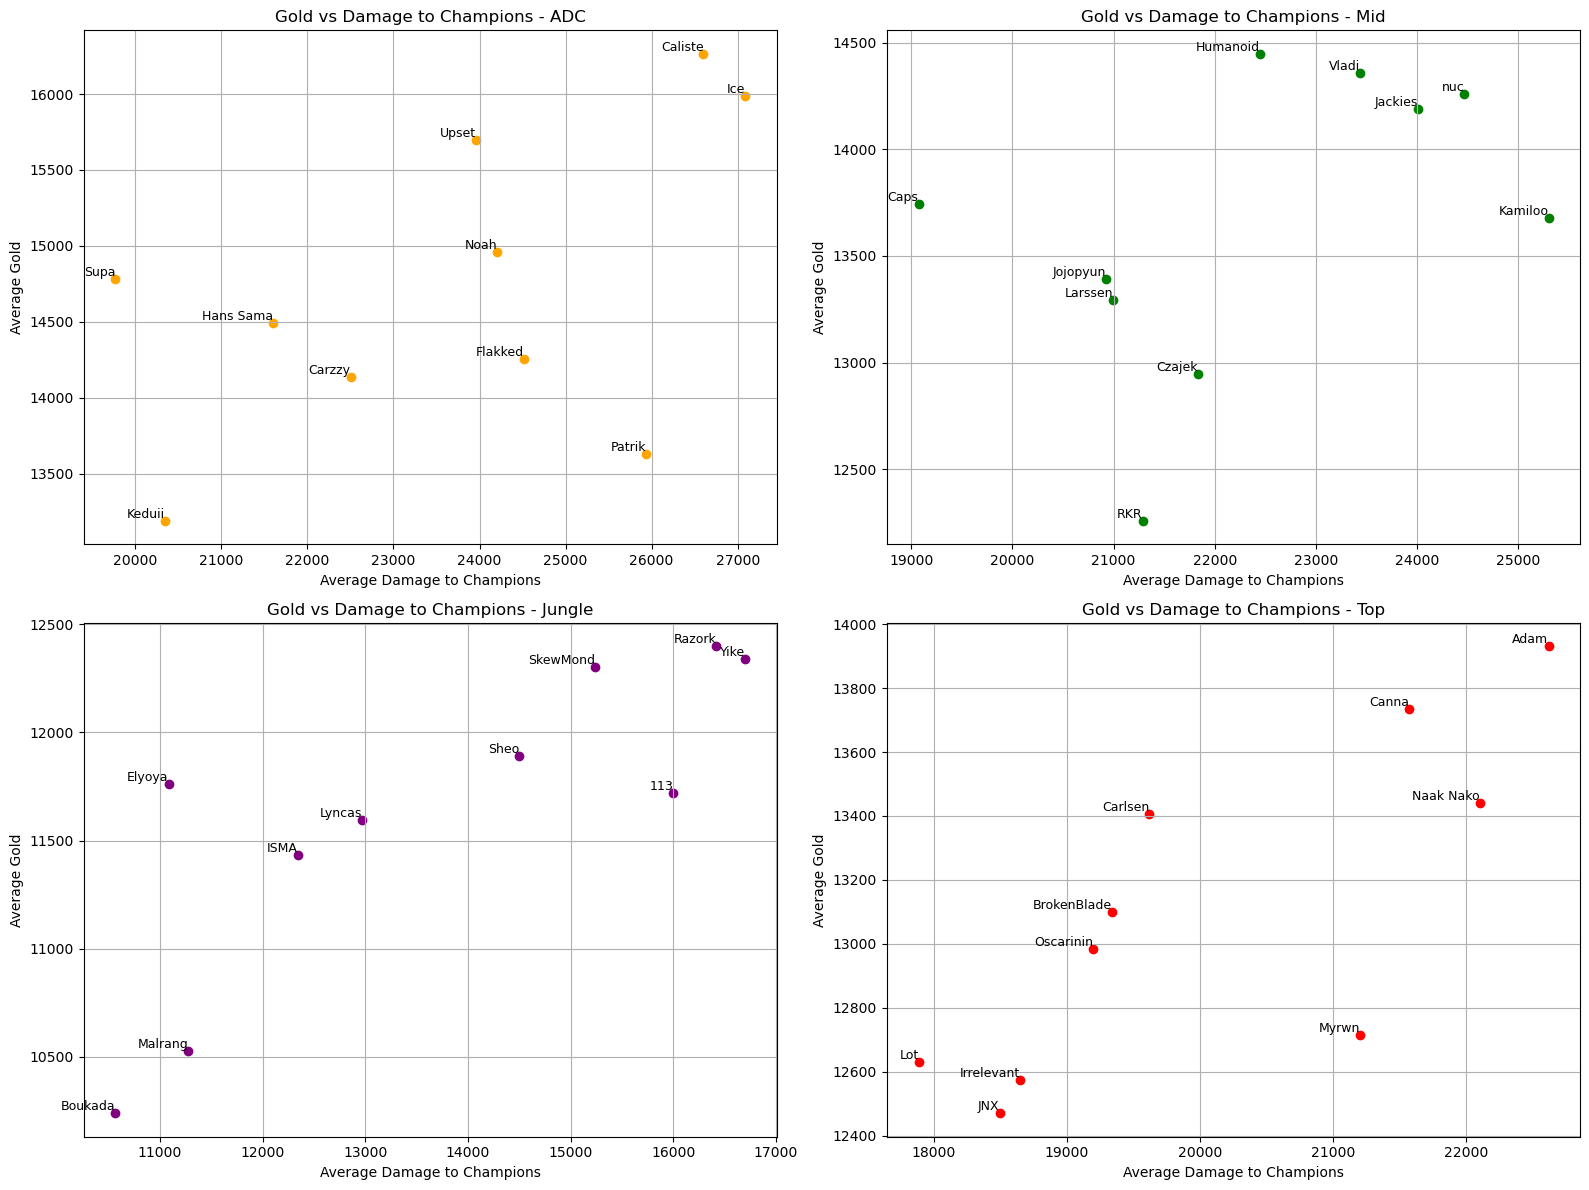

In [38]:
#plot the DMG vs Gold for each role
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
# ADC
axs[0, 0].scatter(dmg_gold_adc['DamageToChampions'], dmg_gold_adc['Gold'], color='orange')
for i, row in dmg_gold_adc.iterrows():
    axs[0, 0].text(row['DamageToChampions'], row['Gold'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[0, 0].set_title("Gold vs Damage to Champions - ADC")
axs[0, 0].set_xlabel("Average Damage to Champions")
axs[0, 0].set_ylabel("Average Gold")
axs[0, 0].grid(True)
# Mid
axs[0, 1].scatter(dmg_gold_mid['DamageToChampions'], dmg_gold_mid['Gold'], color='green')
for i, row in dmg_gold_mid.iterrows():
    axs[0, 1].text(row['DamageToChampions'], row['Gold'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[0, 1].set_title("Gold vs Damage to Champions - Mid")
axs[0, 1].set_xlabel("Average Damage to Champions")
axs[0, 1].set_ylabel("Average Gold")
axs[0, 1].grid(True)
# Jungle
axs[1, 0].scatter(dmg_gold_jungle['DamageToChampions'], dmg_gold_jungle['Gold'], color='purple')
for i, row in dmg_gold_jungle.iterrows():
    axs[1, 0].text(row['DamageToChampions'], row['Gold'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[1, 0].set_title("Gold vs Damage to Champions - Jungle")
axs[1, 0].set_xlabel("Average Damage to Champions")
axs[1, 0].set_ylabel("Average Gold")
axs[1, 0].grid(True)
# Top
axs[1, 1].scatter(dmg_gold_top['DamageToChampions'], dmg_gold_top['Gold'], color='red')
for i, row in dmg_gold_top.iterrows():
    axs[1, 1].text(row['DamageToChampions'], row['Gold'], row['Name'], fontsize=9, ha='right', va='bottom')
axs[1, 1].set_title("Gold vs Damage to Champions - Top")
axs[1, 1].set_xlabel("Average Damage to Champions")
axs[1, 1].set_ylabel("Average Gold")
axs[1, 1].grid(True)
plt.tight_layout()
plt.show()